<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bayesian-estimation-of-a-logistic-regression-model" data-toc-modified-id="Bayesian-estimation-of-a-logistic-regression-model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bayesian estimation of a logistic regression model</a></span></li><li><span><a href="#logit-and-inverse-logit-functions" data-toc-modified-id="logit-and-inverse-logit-functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>logit and inverse logit functions</a></span></li><li><span><a href="#Steps-of-Bayesian-data-analysis" data-toc-modified-id="Steps-of-Bayesian-data-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Steps of Bayesian data analysis</a></span></li><li><span><a href="#Step-1---Identify-the-relevant-data-for-question-under-investigation" data-toc-modified-id="Step-1---Identify-the-relevant-data-for-question-under-investigation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Step 1 - Identify the relevant data for question under investigation</a></span></li><li><span><a href="#Exploratory-analysis-and-daata-visualisation" data-toc-modified-id="Exploratory-analysis-and-daata-visualisation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exploratory analysis and daata visualisation</a></span></li><li><span><a href="#Step-2---Define-the-descriptive-statistical-model-\begin{align*}
\\y_n-&amp;\sim-Bernoulli(logistic(\alpha-+-\beta-x))
\\
\alpha-&amp;\sim-Normal(0,-1.5)
\\
\beta-&amp;\sim-Normal(0,0.3)
\end{align*}" data-toc-modified-id="Step-2---Define-the-descriptive-statistical-model-\begin{align*}
\\y_n-&amp;\sim-Bernoulli(logistic(\alpha-+-\beta-x))
\\
\alpha-&amp;\sim-Normal(0,-1.5)
\\
\beta-&amp;\sim-Normal(0,0.3)
\end{align*}-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Step 2 - Define the descriptive statistical model <div class="MathJax_Display MathJax_Processing"></div><script type="math/tex; mode=display" id="MathJax-Element-12">\begin{align*}
\\y_n &\sim Bernoulli(logistic(\alpha + \beta x))
\\
\alpha &\sim Normal(0, 1.5)
\\
\beta &\sim Normal(0,0.3)
\end{align*}</script></a></span></li><li><span><a href="#Step-3---Specifying-priors" data-toc-modified-id="Step-3---Specifying-priors-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Step 3 - Specifying priors</a></span></li><li><span><a href="#Fitting-the-model" data-toc-modified-id="Fitting-the-model-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Fitting the model</a></span></li><li><span><a href="#Post-model-fit-visualisations---Bayesian-logisitc-regression" data-toc-modified-id="Post-model-fit-visualisations---Bayesian-logisitc-regression-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Post model fit-visualisations - Bayesian logisitc regression</a></span><ul class="toc-item"><li><span><a href="#Posterior-distribution-plots" data-toc-modified-id="Posterior-distribution-plots-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Posterior distribution plots</a></span></li><li><span><a href="#Posterior--autocorrelation-plots" data-toc-modified-id="Posterior--autocorrelation-plots-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Posterior  autocorrelation plots</a></span></li></ul></li><li><span><a href="#Posterior-trace-plots" data-toc-modified-id="Posterior-trace-plots-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Posterior trace plots</a></span></li><li><span><a href="#Step-5---Posterior-predictive-checks" data-toc-modified-id="Step-5---Posterior-predictive-checks-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Step 5 - Posterior predictive checks</a></span></li><li><span><a href="#Reporting-the-results-of-the-Bayesian-logistic-regression" data-toc-modified-id="Reporting-the-results-of-the-Bayesian-logistic-regression-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Reporting the results of the Bayesian logistic regression</a></span><ul class="toc-item"><li><span><a href="#Write-up" data-toc-modified-id="Write-up-12.1"><span class="toc-item-num">12.1&nbsp;&nbsp;</span><font size="3">Write up</font></a></span></li></ul></li><li><span><a href="#Multiple-logistic-regression" data-toc-modified-id="Multiple-logistic-regression-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Multiple logistic regression</a></span></li><li><span><a href="#Adding-predcitor-variables" data-toc-modified-id="Adding-predcitor-variables-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Adding predcitor variables</a></span><ul class="toc-item"><li><span><a href="#Fitting-multiple-logistic-regression" data-toc-modified-id="Fitting-multiple-logistic-regression-14.1"><span class="toc-item-num">14.1&nbsp;&nbsp;</span>Fitting multiple logistic regression</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>References</a></span></li></ul></div>

In [2]:
# Import data analysis and visualisation packages
import numpy as np
import pandas as pd
import patsy as pt
import pystan as ps
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import arviz as az

In [3]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

# Bayesian estimation of a logistic regression model

Before discussion of Bayesain logistic regression a short of the review of classical logistic regression is reguired. Logistic regression is part of the generalised linear model framework and like all regression models within this framework its primary application within the proccess of modelling data is for parameter estimation for the purpose of prediction and for logistic regression this is done specfically in terms of the modelling of binary outcome data ($y$ that take on values of either 0 or 1). 

In order to model this type of data two additonal features are required on top of the standard regression model $y = \alpha + \beta x$. These featues being:
     1. a nonlinear transformation which bounds outputs between 0 and 1.
     2. modelling the resulting outcomes as probabilities.
     
The features above are achieved through the generalised linear model framewrok through the application of a link function which for logistic regression is the the logistic function $logit(x) = log(\frac{x}{1-x})$ that maps the outome space of (0,1) to $(-\infty,\infty )$.

In additon to the logit(x) function the inverse logit function $logit^{-1} = \frac{e^x}{1+e^x}$ is alos of critcal importance as this allows the coeffients oestiamted form the model to be converted into probabilities for ease of interpretation.

Of course classical logistic regression as regularly applied takes a Null hypothesis singificance testing for which the p-values are calculated for each regression coefficient using the Wald test (unlike regular regression which uses t-tests).

$$Z = \frac{\hat{\beta}}{s.e.(\hat{\beta})}$$

$\hat{\beta}$ = maximum likelihood estimate.

$s.e.$ = standard error

With this commonly testing the null hypothesis of $H_0: \hat{\beta} = 0$

# logit and inverse logit functions

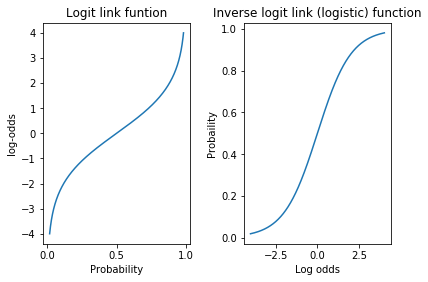

In [15]:
# Generate numbers from logistic function 
y = np.linspace(-4, 4, num = 1000)
x = stats.logistic.cdf(y)

# plot logit function
plt.subplot(1, 2, 1);

plt.plot(x,y);
plt.title("Logit link funtion");
plt.xlabel('Probability');
plt.ylabel('log-odds');

# plot inverse logit function
plt.subplot(1, 2, 2);
plt.plot(y,x);
plt.title("Inverse logit link (logistic) function");
plt.xlabel('Log odds');
plt.ylabel('Probaility');

# Add space between subplots
plt.tight_layout(pad=1)

For clarity, the plots above show how the logit funtion maps probability scale onto the log odds scale and how the inverse logit log odds to probability scale.

# Steps of Bayesian data analysis

<font size = "3"> Kruscke (2015) offers a step by step formulation for how to conduct a Bayesian analysis:

1. Identify the relevant data for question under investigation.

2. Define the descriptive (mathematical) model for the data.

3. Specify the Priors for the model. In the case of scientific research publication is the goal, as such the priors must be accepted by a skeptical audience. Much of this can be achieved using prior predcitve checks to acsetain os the priors are reasonable.

4. Using Bayes rule estimate the posterior for the parameters of the model using the likelihood and priors. Then interprete and the posterior

5. Conduct model checks. i.e. Posterior predcitive checks.</font> 

<font size = "1">This notebook will follow this approach generally.</font> 

#  Step 1 - Identify the relevant data for question under investigation

The following data has been downloaded from https://www.sheffield.ac.uk/mash/statistics/datasets and contains data about 42 mothers and their newborns. The change in the source of data here from https://sites.google.com/view/openstatslab used within the other notebooks is simply due to know datasets specifcally aimed at demonstrating logistic regression at https://sites.google.com/view/openstatslab.

As stated above the data used below is from mothers and their newborns. The point of the logistic regression analysis below is estimate the probability of low birth weight (low being anthing < 6$lbs$) using relevant predictor variables. within the first analysis below only a dictomous predictor varaible will be modelled - smoking status of the mother - in order to estimate the differnce in the probability of the child being born < 6$lbs$ in weight. of the 42, 20 were non-smokers and 22 were smokers.

In [98]:
# Change working directorty to import data for analysis.
url = "https://raw.githubusercontent.com/ebrlab/Statistical-methods-for-research-workers-bayes-for-psychologists-and-neuroscientists/master/Data/Birthweight_reduced_kg.csv"
#Import data .csv file into pandas dataframe.
df = pd.read_csv(url)

# Output data frame for evaluation
df.head()

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
0,1360,56,4.55,34,44,0,20,0,162,57,23,10,35,179,0,0
1,1016,53,4.32,36,40,0,19,0,171,62,19,12,0,183,0,0
2,462,58,4.10,39,41,0,35,0,172,58,31,16,25,185,0,1
3,1187,53,4.07,38,44,0,20,0,174,68,26,14,25,189,0,0
4,553,54,3.94,37,42,0,24,0,175,66,30,12,0,184,0,0


# Exploratory analysis and daata visualisation

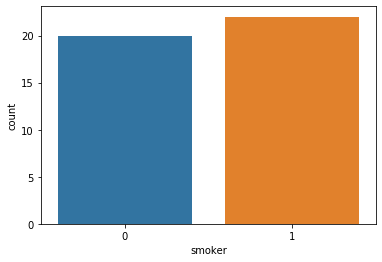

In [80]:
# plot the numner of smokers vs non smokers.
sns.countplot(x="smoker", data=df);

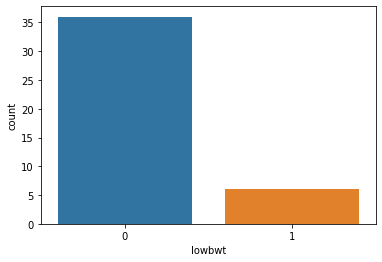

In [81]:
# plot the numner of low birth weight vs non low-birthweight births.
sns.countplot(x="lowbwt",  data=df);

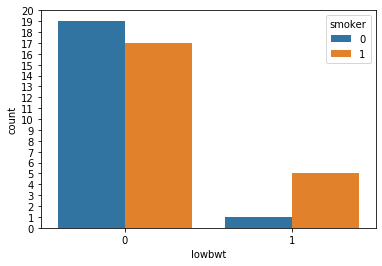

In [97]:
# Plot the count of low birthweight vs non births vs non low-birthweight births split by smoking status.
sns.countplot(x="lowbwt", hue="smoker", data=df).set_yticks(list(range(0, 21)));

# Step 2 - Define the descriptive statistical model \begin{align*}
\\y_n &\sim Bernoulli(logistic(\alpha + \beta x))
\\
\alpha &\sim Normal(0, 1.5)
\\
\beta &\sim Normal(0,0.3)
\end{align*}

# Step 3 - Specifying priors

Of course the analysis below is a Bayesian data analysis and therefore we need to specify priors. The diffculty of specifying priors in the logistic regression case extends beyond expressing our ignoranne of model parameters in terms of probabilities, because priors withinin a logistic regression are expressed in terms of log-odds. The difficulty of this arises as the relationship between log-odds and probabilities is non-linear (see, plots above). Therefore, using prior predictive checks is a good safeguard from specfiying ridiculous priors and can show why the ones selected above have been selected essentially for being reasonble in the face of this non-linearity. 

The prior predcitive checks within this analyis will be conducted using Stan instead of directly codin git up using python.

In [16]:
logisticRegression = """

data {

  int<lower=0> N;
  int K;
  matrix[N,K] x;
  int<lower=0,upper=1> y[N];
  
  // logically evaluates below to determine if it running Prior predictive checks.
  int<lower= 0, upper = 1> onlyprior; 
  
  // values for setting priors in the model block
  real intercept_mu;
  real intercept_sd;
  
  real slope_mu;
  real slope_sd;
  
}

parameters {
// First beta parameter is the alpha parameter of the model
// This format is simple shorter and allows vectorisation
  vector[K] beta;
}

model {
// Priors
beta[1] ~ normal(intercept_mu, intercept_sd);


// Set up to genralise to greater number of predictors
for (i in 2:K){
beta[i] ~ normal(slope_mu, slope_sd);
}

// Likelihood
 if(!onlyprior)
  y ~ bernoulli_logit(x * beta);
}

generated quantities{

//Vectorised prior/posterior checks
int yrep[N] = bernoulli_logit_rng(x * beta);

// Ouput the converted log-odds of the estimated parameters to the probability scale (0,1) 
// using the inverse logit function
vector[K] P_beta = inv_logit(beta);

}

"""

In [17]:
sm = ps.StanModel(model_code = logisticRegression)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_a99eac55034565df8ec4565b5c717439 NOW.


In [122]:
x = pt.dmatrix(" ~ smoker", data = df)
x = np.asarray(x)

In [104]:
Prior_data = {'N': len(df),
        'x': x,
        'K': 2,
        'y': df["lowbwt"].values,
        # set to 1 to run prior predcitive check
        'onlyprior': 1,
        'intercept_mu': 0,
        'intercept_sd': 1.5,
        'slope_mu': 0,
        'slope_sd': .3}

In [22]:
prior_PC = sm.sampling(data = Prior_data, iter = 2000, chains = 4, seed = 1, warmup = 1000)

In [23]:
# Because of python print stament it is easier to extract the results of the prior predictive
# checks into a panda data frame.
summary = prior_PC.summary()
prior_df = pd.DataFrame(summary['summary'], 
                  columns = summary['summary_colnames'], 
                  index = summary['summary_rownames'])

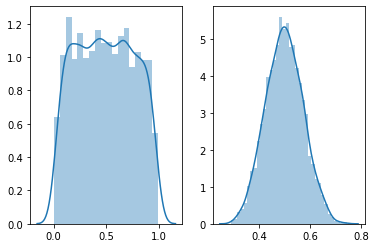

In [24]:
#Plot the probablities generated by the prior predcitive checks
plt.subplot(1, 2, 1);
sns.distplot(prior_PC['P_beta[1]']);
plt.subplot(1, 2, 2);
sns.distplot(prior_PC['P_beta[2]']);

As you can now see the priors that were selected result in relatively uniform prior distributions over probability scale of (0,1) for the intercept term and general balcance between potential for no effect at .5 probability and potetnial for larger effects on the slope terms before seeing the data.

An activity left to the curious reader if they are interested is to test the code above by altering the priors parameter values to test their impacts.

# Fitting the model

Now that reasonable priors have been specified above it is time to fit the model.

In [118]:
data = {'N': len(df),
        'x': x,
        'K': x.shape[1],
        'y': df["lowbwt"].values,
        # set to 1 to run prior predcitive check
        'onlyprior': 0,
        'intercept_mu': 0,
        'intercept_sd': 1.5,
        'slope_mu': 0,
        'slope_sd': .3}

In [119]:
fit = sm.sampling(data = data, iter = 2000, chains = 4, seed = 1, warmup = 1000)

In [120]:
# Because of python print stament it is easier to extract the results of the prior predictive
# checks into a panda data frame.
summary = fit.summary()
fit_df = pd.DataFrame(summary['summary'], 
                  columns = summary['summary_colnames'], 
                  index = summary['summary_rownames'])

In [121]:
# Outputs from the fitted model.
fit_df.tail()

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
yrep[41],0.165250,0.006044,0.371452,0.000000,0.000000,0.000000,0.000000,1.000000,3777.655211,0.999902
yrep[42],0.171250,0.006076,0.376774,0.000000,0.000000,0.000000,0.000000,1.000000,3844.935379,0.999551
P_beta[1],0.171449,0.001110,0.059663,0.075904,0.128696,0.164933,0.206095,0.303828,2887.650172,0.999149
P_beta[2],0.457620,0.001295,0.068792,0.322726,0.411176,0.457425,0.505007,0.590679,2822.965131,0.999473
lp__,-18.704997,0.023598,1.047727,-21.550484,-19.098093,-18.402748,-17.961831,-17.708924,1971.338997,1.001833


In [31]:
fit['yrep'].T.shape

(42, 4000)

# Post model fit-visualisations - Bayesian logisitc regression

## Posterior distribution plots

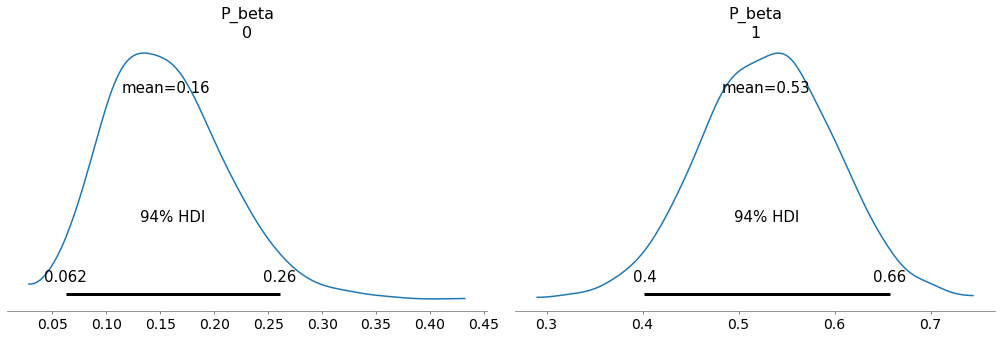

In [114]:
az.plot_posterior(fit,var_names = ('P_beta'));

## Posterior  autocorrelation plots

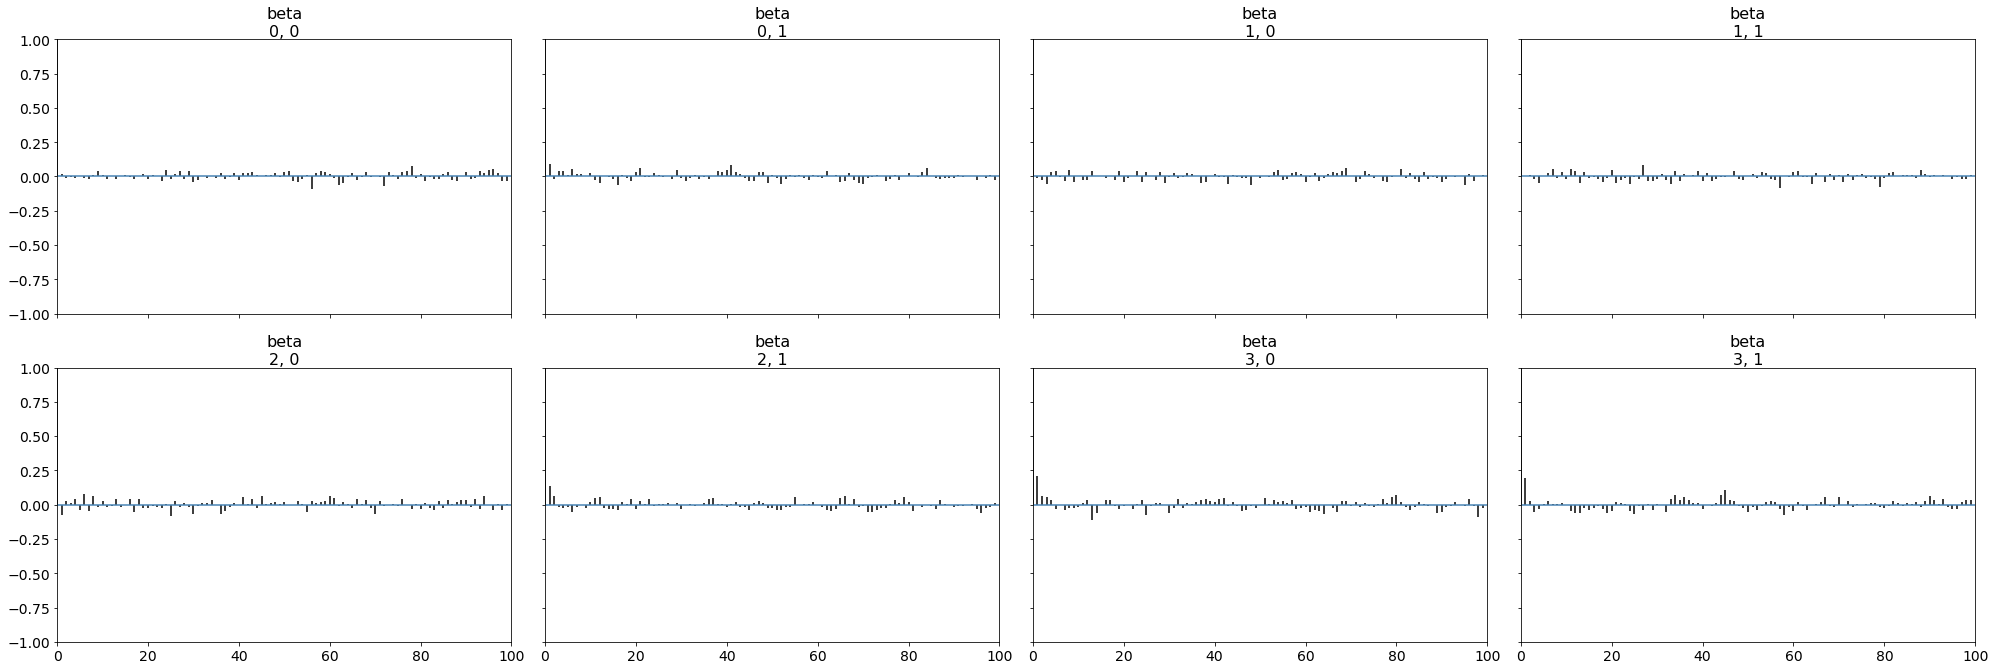

In [30]:
az.plot_autocorr(fit,var_names = ('beta'));

# Posterior trace plots 

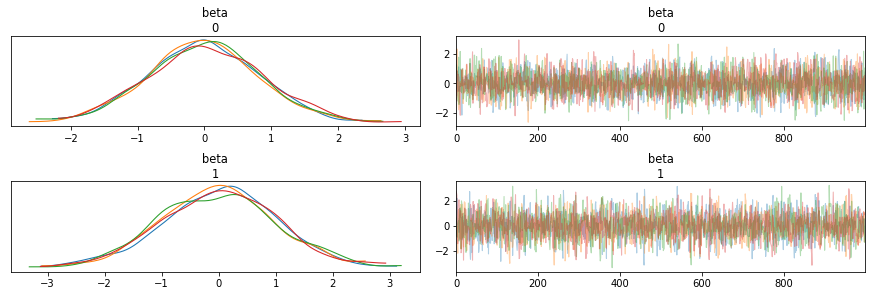

In [31]:
az.plot_trace(fit,var_names = ('beta'));

# Step 5 - Posterior predictive checks

# Reporting the results of the Bayesian logistic regression

<font size = "3">As Kruscke correctly points out there is not standard formula or presentation method for results in journal articles like the APA guide for reporting frequentist analysis using the Bayesian framework. It is likely there never will be, because as McElreath (2020) explains, Bayesian data analysis is more like a engineering approach to the problem and the resulting model that is fit will be analysis specific. In addition, as Gabry et al, (2019) argue visualisations maybe even more key for decribing and analysis (show dont tell); as such the all the visualisations used above would likely be included with any write up. Anyway,  the write up below generally follows the advice of Kruscke (2015) chapter 25. In any application though it comes down to the problem to be described and the audience that needs to be convinced. </p><br/>

<h2>Write up</h2><br/>

The data on newborn weights were analysed in order to estimate the probability of infants being underweight (dichotomised as $y < 6 lbs = $ underweight, by fitting the logistic regression model defined above using mother smoking status during pregnancy as as predictor. As the model is a logistic regression regression the likelihood used was the bernoulli lielihood using the logit link function, with $\alpha$ and $\beta$ parameters. The prior slected for the $\alpha$ parameter was $Normal(0, 1.5)$ and for the $\beta$ parameter $Normal(0, 0.3$. These priors were determined by conducting prior predictive checks and observing that model parameters in the case of $\alpha$ parameter has uniform prior probaiblity for the probability scores before seeing the data. In the case of $\beta$ parameter prior probability is given for a range of probability scores estimates but not overly extreme probabilites such as 0/100%.
 
Four MCMC chains were ran to acquire 2000 samples with the first 1000 samples being for warm up. Resulting in 4000 saved samples for use in condcuting our inferences Convergence of the MCMC chains was examined using autocorrelation and traceplots (in a paper referncing appropriate figures here will be of value). Both sets of plots showed no issues of autocorrelation or lack of mixing for the chains.

Using dummy coding for the contrasts of interest the model parameter posteriors showed that the most credible value for the $\alpha$ parameter (the average probabilty for birthweight to be < 6lbs for non-smoking mothers) to be $\mu$ = .16 with a 95% CrI [.06, .26]). The $\beta$ parameter (under dummy coding the difference in probaability between non-smoker & smokers) 
most credible value  to be $\mu$ = .53 with a 95% CrI [.40, .66]). For this analysis, the crucial parameter of interest is the $\beta$ parameter for the contrast between non-smokers and smokers mother and predicting probability of low infant birth weight. As the credible values for $beta$ showed the 95% CrI [.40, .66] was consistent with the data and thus we have can predict ubased on this estimation that smoking during pregnancy increases the probabilty of an infants birthweight being $< 6lbs$ between .40 and .66 percent with a 95% probability.

Finally posterior predcitive checks showed that the orignal data could be reasonble generated by the model.

# Multiple logistic regression

The simple example above was equivalnet to a comparison of proportions, but logistic regression like other types of regression can be expanded to model multiple predictors at once. This will be demonstrated in the following section below.

# Adding predcitor variables

For the example below ad additonal predcitor varaible will be added to the analysis to estimate the $p(\theta|y = 1)$. The predictor that will be added to the analysis is mothers age a  contious predcictor that has been found to seemingly affect  many postnatal outocomes including birthweight (Richards, Hardy, Kuh, & Wadsworth, 2002).

## Fitting multiple logistic regression

In [34]:
# Create the design matrix for the logistic regression
x_2 = pt.dmatrix(" ~ smoker + mage ", data = df)
x_2 = np.asarray(x_2)

In [40]:
data_2 = {'N': len(df),
        'x': x_2,
        'K': x_2.shape[1],
        'y': df["lowbwt"].values,
        # set to 1 to run prior predcitive check
        'onlyprior': 0,
        'intercept_mu': 0,
        'intercept_sd': 1.5,
        'slope_mu': 0,
        'slope_sd': .3}

In [54]:
# Fit the multiple logsitic regression to the data.
fit_2 = sm.sampling(data = data_2, iter = 100000, chains = 4, seed = 1, warmup = 1000)

In [55]:
# Because of python print stament it is easier to extract the results of the prior predictive
# checks into a panda data frame.
summary = fit_2.summary()
fit2_df = pd.DataFrame(summary['summary'], 
                  columns = summary['summary_colnames'], 
                  index = summary['summary_rownames'])

In [56]:
fit2_df.head()

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
beta[1],-0.245845,0.003062,1.224551,-2.627721,-1.073698,-0.253144,0.577879,2.170942,159980.157188,1.000031
beta[2],0.157684,0.000619,0.285639,-0.401304,-0.035125,0.157552,0.350581,0.717703,213017.454137,0.999997
beta[3],-0.068684,0.000131,0.051943,-0.173891,-0.102998,-0.067395,-0.033067,0.029473,158256.961997,1.000026
yrep[1],0.175530,0.000605,0.380421,0.000000,0.000000,0.000000,0.000000,1.000000,395148.752136,0.999998
yrep[2],0.185712,0.000625,0.388875,0.000000,0.000000,0.000000,0.000000,1.000000,387031.191178,0.999999


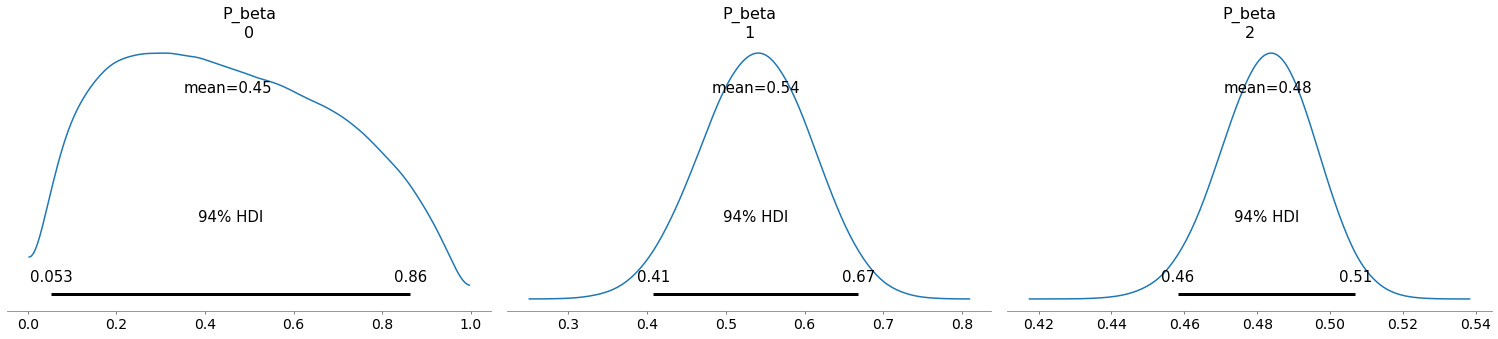

In [57]:
az.plot_posterior(fit_2,var_names = ('P_beta'));

# References

Gabry, J., Simpson, D., Vehtari, A., Betancourt, M., & Gelman, A. (2019). Visualization in Bayesian workflow. Journal of the Royal Statistical Society: Series A (Statistics in Society), 182(2), 389-402.

Gelman, A., J, Hill., A, Vehtari (2020). Regression and other stories. New york, NY: Cambridge university Press.
    
Kruschke, J. (2015). Doing Bayesian data analysis: A tutorial with R, JAGS and Stan. Oxford, England: Academic Press.    
    
McElreath, R. (2020). Statistical rethinking: A Bayesian course with examples in R and Stan. Boca Raton: CRC Press.

Richards, M., Hardy, R., Kuh, D., & Wadsworth, M. E. (2002). Birthweight, postnatal growth and cognitive function in a national UK birth cohort. International Journal of Epidemiology, 31(2), 342-348.